# Data exploration in "easy" paradigm

In [1]:
import sys
sys.path.append('/Users/su/PhD-project/colornoise/venv/lib/python3.8/site-packages')


In [1]:
from exploredata import ExploreData

## Data: ysu, hue set 2

In [2]:
data_ysu_easy = ExploreData('ysu', sel_par=['cn2x8_LL_easy_a.yaml'], rm_ses=['0917T10'])  # remove two sessions 

In [3]:
# data_ysu_easy.pfplot()
# data_ysu_easy.threshplot(polar=True)
# data_ysu_easy.paramplot()

/home/yannan/PhD-projects/colornoise_easy_v2/colorpalette.py:183: UserWarning: No subjective adjustment is requested.
  warnings.warn("No subjective adjustment is requested.")


label: centre, std, ssq
hue_0:[0.52347178 4.08437608], 5.046965202372337
hue_1:[0.40347824 2.32463981], 0.7717310441054622
hue_2:[-0.90892134  2.02206268], 0.9534262140375919
hue_3:[0.38095261 4.34462276], 3.6703802963537075
hue_4:[0.70914453 1.8067128 ], 1.2428053784547861
hue_5:[-0.49653393  1.75555767], 0.6848679375890951
hue_6:[-0.52091012  1.5647877 ], 0.9441972481841909
hue_7:[0.1775108  2.31028067], 1.1792398894107066


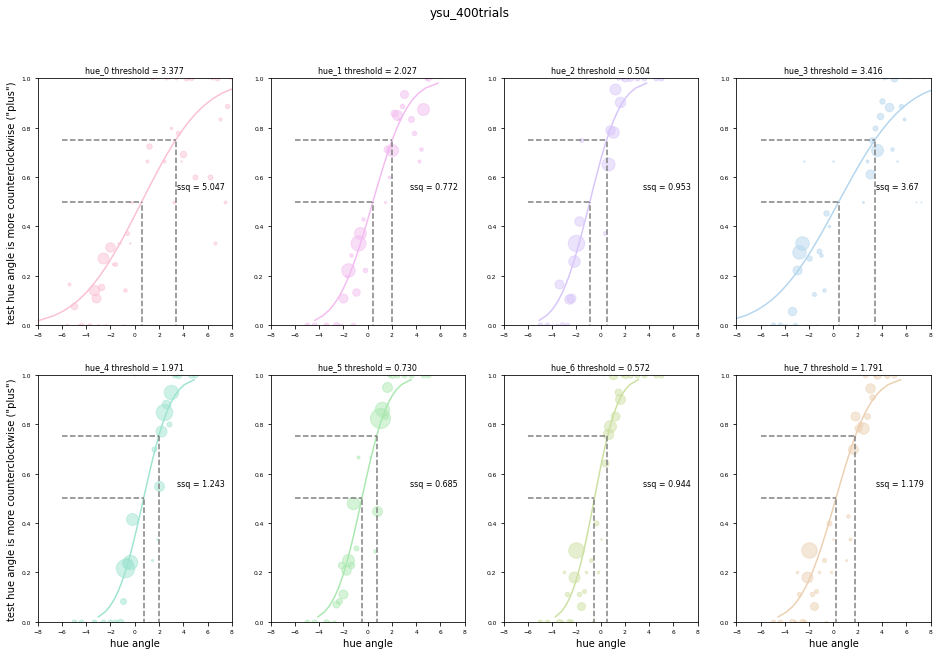

/home/yannan/PhD-projects/colornoise_easy_v2/colorpalette.py:183: UserWarning: No subjective adjustment is requested.
  warnings.warn("No subjective adjustment is requested.")


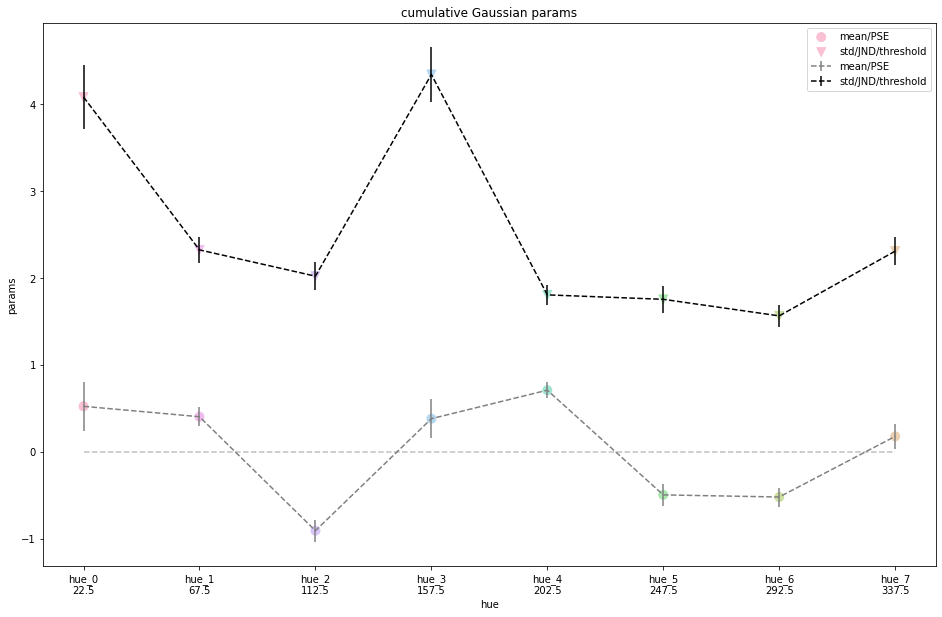

In [4]:
data_ysu_easy.rearrange_pfplot()
data_ysu_easy.rearrange_paramplot()

## Ananlyze partial data to discover the optimal session number

In [8]:
# All datasets (10 sessions)
data_ysu_easy = ExploreData('ysu', sel_par=['cn2x8_LL_easy_a.yaml'], rm_ses=['0917T10'])  
rearr_all = data_ysu_easy.rearrange()

In [9]:
# Repeat sampling partial data (e.g. 6 sesssions out of 10)

import numpy as np
import random
import pandas as pd

sample_n = 6
total_n = 10
rearr_part = []

for rp in range(20):
    idx = random.sample(range(total_n), sample_n)
    part = ExploreData('ysu', sel_par=['cn2x8_LL_easy_a.yaml'], rm_ses=['0917T10'], sel_ses_idx=idx)
    rearr_part.append(part.rearrange())

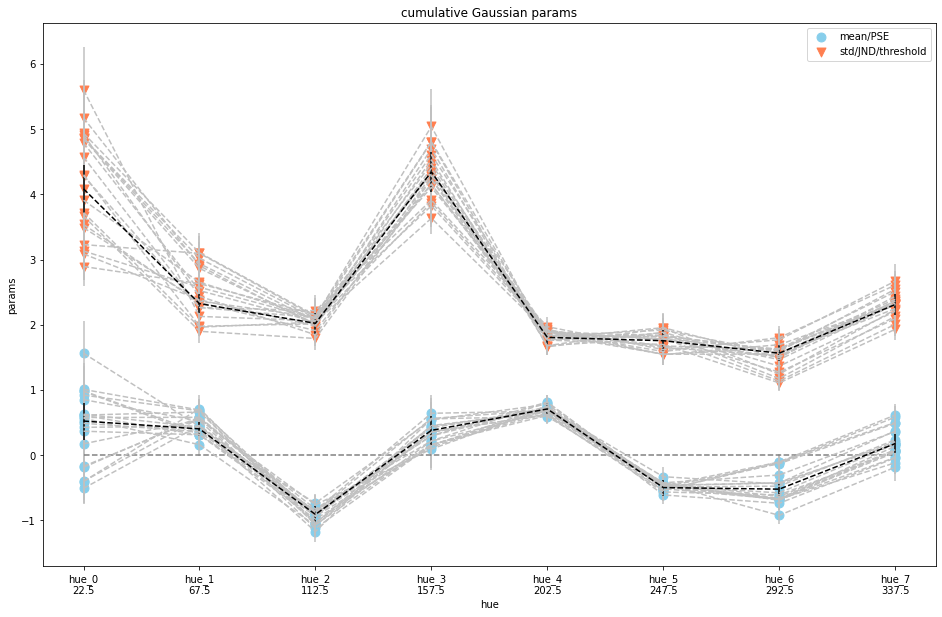

In [10]:
# Plot parameters

import matplotlib.pyplot as plt

num = len(rearr_part[0])
hues = rearr_part[0]['hue']
angles = [(n / float(num) * 360 + 22.5) for n in range(num)]

plt.figure(figsize=(16, 10))
ax = plt.subplot(111)
ax.set_title('cumulative Gaussian params')


# plot partial data
for rearranged in rearr_part:
    centre = rearranged['fit'].map(lambda x: x.params[0])
    std = rearranged['fit'].map(lambda x: x.params[1])
    par_err = rearranged['fit'].map(lambda x: np.sqrt(np.diagonal(x.covar)))
    ax.errorbar(range(num), centre, yerr=[x[0] for x in par_err], color='silver', ls='--')
    ax.errorbar(range(num), std, yerr=[x[1] for x in par_err], color='silver', ls='--')
    ax.scatter(range(num), centre, s=80, color='skyblue', marker='o')
    ax.scatter(range(num), std, s=80, color='coral',  marker='v')

# plot all data
centre = rearr_all['fit'].map(lambda x: x.params[0])
std = rearr_all['fit'].map(lambda x: x.params[1])
par_err = rearr_all['fit'].map(lambda x: np.sqrt(np.diagonal(x.covar)))
ax.errorbar(range(num), centre, yerr=[x[0] for x in par_err], color='black', ls='--')
ax.errorbar(range(num), std, yerr=[x[1] for x in par_err], color='black', ls='--')
ax.scatter(range(num), centre, s=80, color='skyblue', label='mean/PSE', marker='o')
ax.scatter(range(num), std, s=80, color='coral', label='std/JND/threshold', marker='v')

ax.plot(range(num), np.repeat(0, num), '--', color='grey')

xlabels = [f"{l}\n{a}" for l, a in zip(hues, angles)]
ax.set_xticks(range(num))
ax.set_xticklabels(xlabels)
ax.set_xlabel('hue')
ax.set_ylabel('params')
plt.legend()
# if savefig:
#     plt.savefig('data_analysis_LL/pf_plots/' + self.sub + '_' + 'PF_params_plot_' + str(ntrial) + '_trials' + '.pdf')
plt.show()    

## Does the noise level have to be non-uniform across hues?

Five hues are used in deterimining the noise level.

x_1p: 112.5 (+ 5)

x_2p: 292.5 (+ 5)

y_1p: 22.5  (+ 10)

y_2p: 202.5 (+ 5)

z_p: 337.5  (+ 6)

3.4438250375666524  +/-  0.472
1.781747749828237  +/-  0.882
3.2169967346274357  +/-  0.329
3.500469937439674  +/-  0.894
4.3302306670860595  +/-  0.507


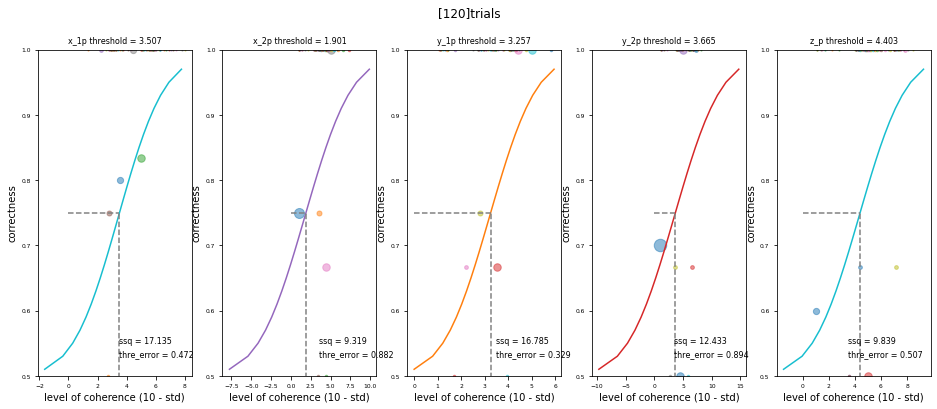

In [11]:
from noise_level_analysis import fitnoise
dfs, pool = ExploreData('ysu', sel_par=['config/cn1x5_HH_nl_c.yaml'], 
                                         xrl_path='data/ysu/noise_test/ysu.xrl').sumxrl()

fitnoise(pool)

## H-H noise data with an uniform noise level for all the hues

In [12]:
from exploredata import ExploreData
data_ysu_easy = ExploreData('ysu', sel_par=['cn2x8_LL_easy_a.yaml'], rm_ses=['0917T10'])  # 10 sessions after removing two sessions 
hh_data = ExploreData('ysu', sel_par=['cn2x8_HH_ysu_test.yaml'], rm_ses=['0930','1001T10']) # 8 sessions after removing two


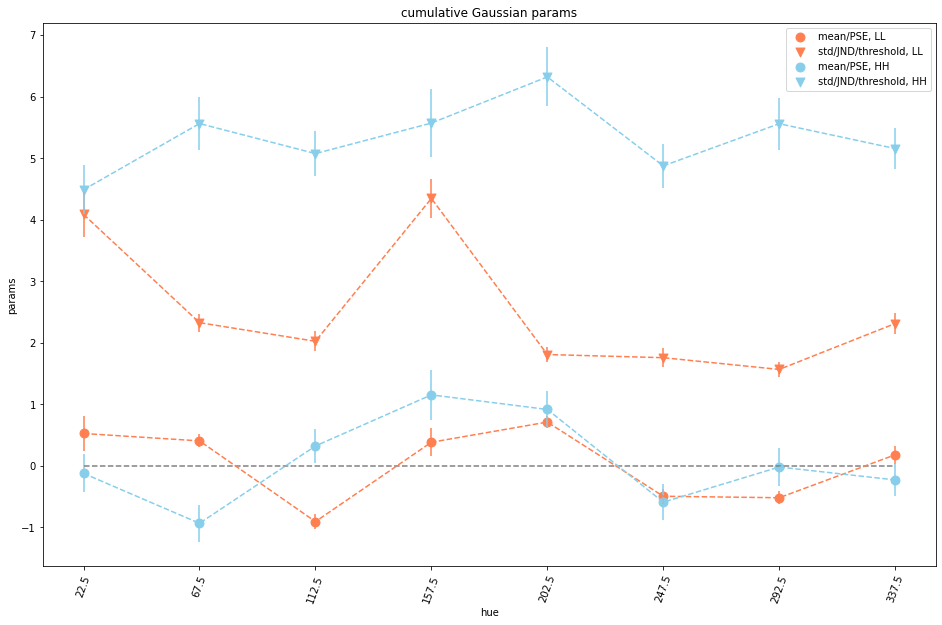

In [13]:
import matplotlib.pyplot as plt
import numpy as np

rearr_ll = data_ysu_easy.rearrange()
rearr_hh = hh_data.rearrange()

num = len(rearr_ll)
angles = [(n / float(num) * 360 + 22.5) for n in range(num)]

plt.figure(figsize=(16, 10))
ax = plt.subplot(111)
ax.set_title('cumulative Gaussian params')

centre_ll = rearr_ll['fit'].map(lambda x: x.params[0])
std_ll = rearr_ll['fit'].map(lambda x: x.params[1])
par_err_ll = rearr_ll['fit'].map(lambda x: np.sqrt(np.diagonal(x.covar)))

ax.errorbar(range(num), centre_ll, yerr=[x[0] for x in par_err_ll], color='coral', ls='--')
ax.errorbar(range(num), std_ll, yerr=[x[1] for x in par_err_ll], color='coral', ls='--')
ax.scatter(range(num), centre_ll, s=80, color='coral', label='mean/PSE, LL', marker='o')
ax.scatter(range(num), std_ll, s=80, color='coral', label='std/JND/threshold, LL', marker='v')

centre_hh = rearr_hh['fit'].map(lambda x: x.params[0])
std_hh = rearr_hh['fit'].map(lambda x: x.params[1])
par_err_hh = rearr_hh['fit'].map(lambda x: np.sqrt(np.diagonal(x.covar)))

ax.errorbar(range(num), centre_hh, yerr=[x[0] for x in par_err_hh], color='skyblue', ls='--')
ax.errorbar(range(num), std_hh, yerr=[x[1] for x in par_err_hh], color='skyblue', ls='--')
ax.scatter(range(num), centre_hh, s=80, color='skyblue', label='mean/PSE, HH', marker='o')
ax.scatter(range(num), std_hh, s=80, color='skyblue', label='std/JND/threshold, HH', marker='v')

ax.plot(range(num), np.repeat(0, num), '--', color='grey')

ax.set_xticks(range(num))
ax.set_xticklabels(angles)
plt.xticks(rotation=70)
ax.set_xlabel('hue')
ax.set_ylabel('params')
plt.legend()
plt.show()

## Generate noise levels scaled to the JNDs:

In [14]:
from exploredata import ExploreData
rearr_ysu = ExploreData('ysu', sel_par=['cn2x8_LL_easy_a.yaml'], 
                        rm_ses=['0917T10']).rearrange()  # remove two sessions 

In [15]:
import numpy as np
from config_tools import write_par

JND_ysu = rearr_ysu['fit'].map(lambda x: x.params[1])
sel_idx = 7
sel_std = 6.23  # measured in the pilot test
scale = JND_ysu/JND_ysu[sel_idx]
scale_std = scale.values*sel_std

print(scale_std)

[11.01410027  6.26872146  5.45277923 11.71589239  4.8720577   4.73411062
  4.2196723   6.23      ]


In [16]:
# write_par('config/cn2x8_HH_ysu_scaledN_a.yaml', noise='H-H', method='quest', seed=10, std=scale_std)

## Test PF fitting with constant stimuli

In [35]:
import numpy as np
import yaml
from exploredata import ExploreData
rearr_ysu = ExploreData('ysu', sel_par=['cn2x8_LL_easy_a.yaml'], 
                        rm_ses=['0917T10']).rearrange()  # remove two sessions 

minVal = rearr_ysu['fit'].map(lambda x: x.inverse(0.05))
maxVal = rearr_ysu['fit'].map(lambda x: x.inverse(0.95))

min_max = [[round(x, 2), round(y, 2)] for x, y in zip(minVal, maxVal)]

p = {}
for idx in range(8):
    p['hue_' + str(idx+1) + 'm'] = min_max[idx]
    p['hue_' + str(idx+1) + 'p'] = min_max[idx]

# print(p)

In [34]:
import yaml
with open('config/cn2x8_LL_constantStim.yaml') as f:
    yml = yaml.load(f, Loader=yaml.FullLoader)